<h1><center>Uber Supply Demand Gap Assignment</center></h1>

### Importing the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime

### Initial DataSet Viewing & Analysis

In [2]:
#read the data set of "Uber request data" in inp0.
inp0= pd.read_csv("Uber Request Data.csv")

In [3]:
#Print the head of the data frame.
inp0.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## Data Cleaning

### Checking null values in columns

In [5]:
inp0.isna().sum().sort_values(ascending = False)

Drop timestamp       3914
Driver id            2650
Request id              0
Pickup point            0
Status                  0
Request timestamp       0
dtype: int64

### Initial Data shape

In [6]:
inp0.shape

(6745, 6)

### Dropping unwanted columns

#### Here we are dropping Driver id column because of reasons:
1. This column contains high volumn of null/isna data, since this column conatins ID value which is unique/Personal data which cannot be filled using statistic approaches such as mean,median or mode.
2. Also cannot partially remove only null rows because, if we do so we will loose a lot of data that may result in more insights.Hence we shall drop the column itself

In [7]:
inp0 = inp0.drop(['Driver id'], axis = 1)

### Shape after removing Driver id column

In [8]:
inp0.shape

(6745, 5)

### Rename columns and remove space or special characters so that we can query easily for our analysis

In [9]:
inp0.rename(columns = {'Drop timestamp':'Drop_timestamp','Driver id':'Driver_id','Request id':'Request_id','Pickup point':'Pickup_point','Request timestamp':'Request_timestamp'}, inplace = True)

### Data set with column names after removing space or special characters

In [10]:
inp0.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Converting "Request_timestamp" & "Drop_timestamp" columns dtypes to datetime

In [11]:
inp0['Request_timestamp'] = pd.to_datetime(inp0['Request_timestamp'])
inp0['Drop_timestamp'] = pd.to_datetime(inp0['Drop_timestamp'])

In [12]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request_timestamp  6745 non-null   datetime64[ns]
 4   Drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [13]:
inp0.isna().sum().sort_values(ascending = False)

Drop_timestamp       3914
Request_id              0
Pickup_point            0
Status                  0
Request_timestamp       0
dtype: int64

### Lets investigate "Drop_timestamp" column null values

In [14]:
inp0[inp0.Drop_timestamp.isna()]

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp
2831,2905,City,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,Cancelled,2016-12-07 19:14:00,NaT
...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT


### Lets investigate further and see "Drop_timestamp"  null values based on categorical value column "Status"

In [15]:
inp0[(inp0['Drop_timestamp'].isna())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

#### Conclusion: Drop_timestamp column values are null only when status is equal to "Cancelled" or "No Cars Available" which is valid scenarion. Hence will not drop the rows
1264+2650 = 3914   --- This maps to overall null values and gives us an idea that even status column is clean with no unknown wrong status

----------------------------------------------------
------------------------------------------------

## Question-1: Visually identify the most pressing problems for Uber. 
#### Create plots to visualize the frequency of requests that get canceled or show 'no cars available'; identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

## Univariate Analysis

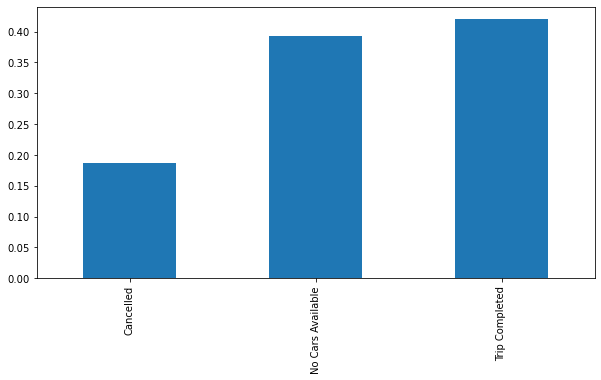

In [16]:
plt.figure(figsize=(10,5))
inp0.Status.value_counts(normalize=True,ascending=True).plot.bar()
plt.show()

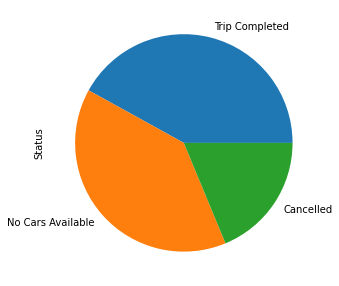

In [17]:
plt.figure(figsize=(10,5))
inp0.Status.value_counts(normalize=True,ascending=False).plot.pie()
plt.show()

### Question: 1a frequency of requests that get canceled or show 'no cars available'
### <span style='background :yellow' >Above Barplot & Pie chart two visuals for frequency of requests that get "Cancelled" or "No cars Available" </span>
### <span style='background :yellow' > Answer : </span>
#### The above plot gives us an insight that "No Cars Available" frequency is more than "Cancelled"

## Bivariate Analysis

#### Let us analyze count of trips for each status with respect to Pickup_points

In [18]:
inp0.groupby(['Status', 'Pickup_point']).size()

Status             Pickup_point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

#### making use of crosstab approach so that we can make of matplots to plot visual for 2 categorical variables

In [19]:
groupresults=pd.crosstab(index=inp0['Pickup_point'],columns=inp0['Status'])
groupresults

Status,Cancelled,No Cars Available,Trip Completed
Pickup_point,,,
Airport,198,1713,1327
City,1066,937,1504


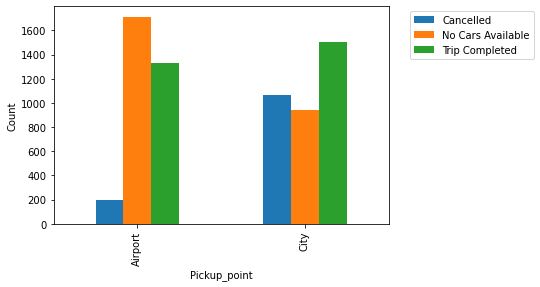

In [20]:
groupresults.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Count")
plt.show()

#### 1b.identify the most problematic types of requests (city to airport/airport to city etc.) 
### <span style='background :yellow' > Above Barplot displays most problematic types of requests based on pickup points - city to airport/airport to city  </span>
### <span style='background :yellow' > Answer </span>
1. From Airport to City there is high frequency for Status = 'No cars available' 
2. From City to Airport there is high frequency for Status = 'Cancelled'

### Creating "request_hr" column and fetching hour data from Request_timestamp

In [21]:
inp0['request_hr'] = inp0['Request_timestamp'].dt.hour

In [22]:
inp0.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,request_hr
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


### Creating New Column "Request_Time_Slot" based "request_hr" column

In [23]:
inp0.loc[inp0['request_hr'].between(1,4, inclusive=True),'Request_Time_Slot'] = 'Mid Night'
inp0.loc[inp0['request_hr'].between(5,8, inclusive=True),'Request_Time_Slot'] = 'Early Morning'
inp0.loc[inp0['request_hr'].between(9,12, inclusive=True),'Request_Time_Slot'] = 'Late Morning'
inp0.loc[inp0['request_hr'].between(13,16, inclusive=True),'Request_Time_Slot'] = 'Afternoon'
inp0.loc[inp0['request_hr'].between(17,20, inclusive=True),'Request_Time_Slot'] = 'Evening'
inp0.loc[inp0['request_hr'].between(21,24, inclusive=True),'Request_Time_Slot'] = 'Night'

In [24]:
inp0.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,request_hr,Request_Time_Slot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning


In [25]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request_timestamp  6745 non-null   datetime64[ns]
 4   Drop_timestamp     2831 non-null   datetime64[ns]
 5   request_hr         6745 non-null   int64         
 6   Request_Time_Slot  6646 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 369.0+ KB


### Lets use the similar approach of cross tab and see how "Request_Time_Slot " vs "Status" map

In [26]:
timeslotresults=pd.crosstab(index=inp0['Request_Time_Slot'],columns=inp0['Status'])
timeslotresults

Status,Cancelled,No Cars Available,Trip Completed
Request_Time_Slot,,,
Afternoon,72,184,370
Early Morning,668,323,681
Evening,124,1127,642
Late Morning,271,233,525
Mid Night,62,243,174
Night,64,484,399


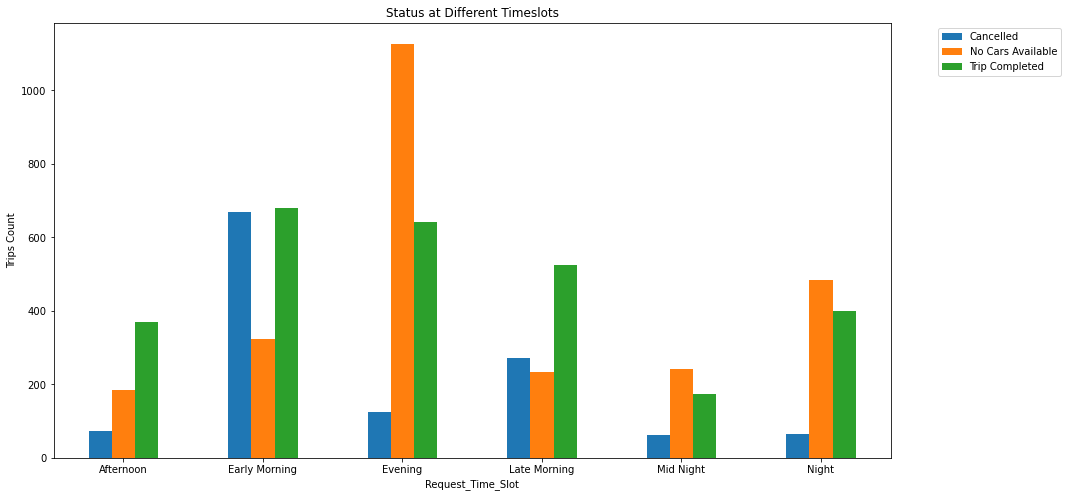

In [27]:
timeslotresults.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Trips Count")
plt.title("Status at Different Timeslots")
plt.xticks(rotation=0, horizontalalignment="center")
plt.gcf().set_size_inches(15, 8)
plt.show()

#### 1c.The time slots displaying high frequecy for "Cancelled" and "No Cars Available"
### <span style='background :yellow' > Above Barplot displays time slots with high frequecy for "Cancelled" and "No Cars Available"  </span>
### <span style='background :yellow' > Answer </span>
1. "Cancelled" frequency is high during Early Morning (5 am -8 am)
2. "No Cars Available" frequency is high during Evening (17 pm - 20 pm)

---------------------------------
----------------------------------

## Question 2: Find out the gap between supply and demand and show the same using plots.

## Gap between Demand Vs Supply 

#### Creating Gap column and assigning Status values as
1. "Demand met - Trip completed" for Trip Completed status
2. "Demand not met - Trip not completed" for "Cancelled" & "No Cars Available" status

#### Explaination : A trip is said to be "Trip Completed" when Demand and supply is met, were as if a trip is "Cancelled" or "No Cars Available" is only when supply is not met to the demand.

In [28]:
Conditions = [(inp0['Status'] == 'Cancelled')|(inp0['Status'] == 'No Cars Available'),inp0['Status'] == 'Trip Completed']
vals =["Demand not met - Trip not completed","Demand met - Trip completed"]

In [29]:
inp0["Gap"] = np.select(Conditions, vals)

In [30]:
inp0.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,request_hr,Request_Time_Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,Demand met - Trip completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,Demand met - Trip completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,Demand met - Trip completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,Demand met - Trip completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Demand met - Trip completed


In [31]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request_timestamp  6745 non-null   datetime64[ns]
 4   Drop_timestamp     2831 non-null   datetime64[ns]
 5   request_hr         6745 non-null   int64         
 6   Request_Time_Slot  6646 non-null   object        
 7   Gap                6745 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 421.7+ KB


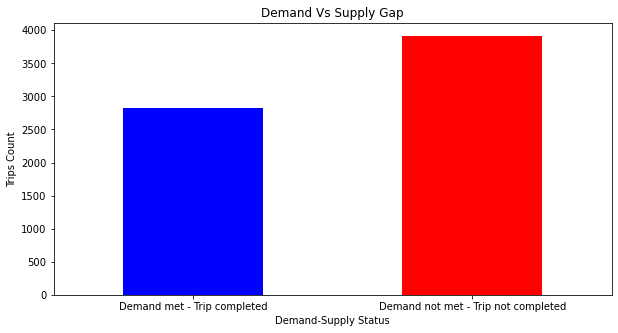

In [32]:
plt.figure(figsize=(10,5))
inp0.Gap.value_counts(ascending=True).plot(kind='bar', color=['Blue','Red'])
plt.ylabel("Trips Count")
plt.xlabel("Demand-Supply Status")
plt.title("Demand Vs Supply Gap")
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [33]:
gapTimeslot=pd.crosstab(index=inp0['Request_Time_Slot'],columns=inp0['Gap'])
gapTimeslot

Gap,Demand met - Trip completed,Demand not met - Trip not completed
Request_Time_Slot,,
Afternoon,370,256
Early Morning,681,991
Evening,642,1251
Late Morning,525,504
Mid Night,174,305
Night,399,548


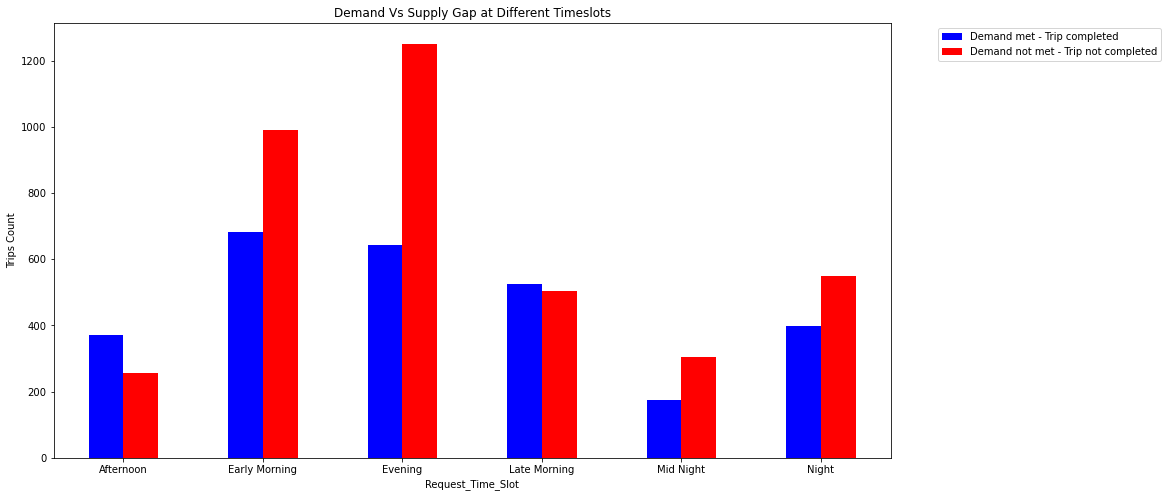

In [34]:
gapTimeslot.plot(kind='bar', color=['Blue','Red'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Trips Count")
plt.title("Demand Vs Supply Gap at Different Timeslots")
plt.xticks(rotation=0, horizontalalignment="center")
plt.gcf().set_size_inches(15, 8)
plt.show()

### 2a. Find the time slots when the highest gap exists
### <span style='background :yellow' > Above Barplot displays time slots when the highest Demad-Supply Gap exists  </span>
### <span style='background :yellow' > Answer: Demand-Supply Gap exists highest at the following Time Slots </span>
1. At Early Morning (5 am -8 am)
2. At Evening (17 pm - 20 pm)

In [35]:
gapTimeslotPickupPoint = pd.DataFrame(inp0.groupby(['Request_Time_Slot','Pickup_point','Gap'])['Request_id'].count().unstack(fill_value=0))
gapTimeslotPickupPoint

Gap                             Demand met - Trip completed  \
Request_Time_Slot Pickup_point                                
Afternoon         Airport                               162   
                  City                                  208   
Early Morning     Airport                               308   
                  City                                  373   
Evening           Airport                               312   
                  City                                  330   
Late Morning      Airport                               239   
                  City                                  286   
Mid Night         Airport                                80   
                  City                                   94   
Night             Airport                               203   
                  City                                  196   

Gap                             Demand not met - Trip not completed  
Request_Time_Slot Pickup_point                                       
Afternoon         Airport                                        90  
                  City                                          166  
Early Morning     Airport                                        29  
                  City                                          962  
Evening           Airport                                      1145  
                  City                                          106  
Late Morning      Airport                                        76  
                  City                                          428  
Mid Night         Airport                                       120  
                  City                                          185  
Night             Airport                                       421  
                  City                                          127

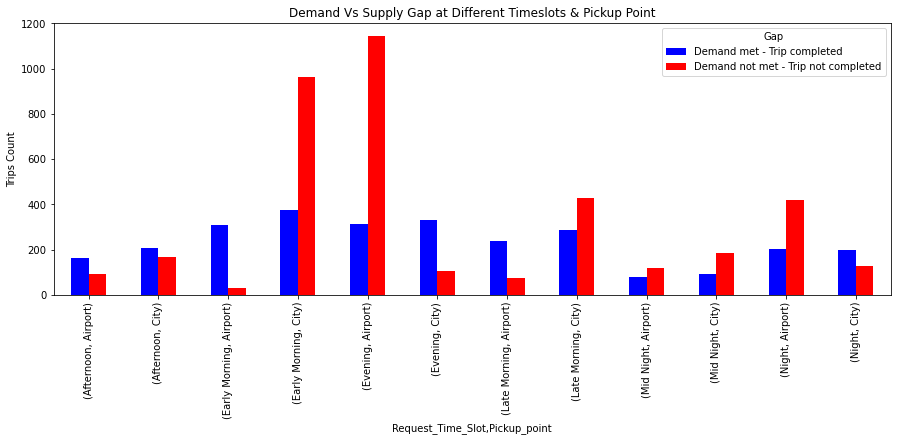

In [36]:
gapTimeslotPickupPoint.plot(kind='bar', color=['Blue','Red'])
plt.ylabel("Trips Count")
plt.title("Demand Vs Supply Gap at Different Timeslots & Pickup Point")
plt.xticks(rotation=90, horizontalalignment="center")
plt.gcf().set_size_inches(15, 5)
plt.show()

### 2b. Find the types of requests for which the gap is the most severe in the identified time slots
### <span style='background :yellow' > Above Barplot displays types of requests for which the gap is the most severe in the time slots  </span>
### <span style='background :yellow' > Answer: Demand-Supply Gap exists highest at the following Time Slots & types of requests (city-airport or airport-city) </span>

1. At Early Morning (5 am -8 am) when Pickup_point = 'City' 
2. At Evening (17 pm - 20 pm) when Pickup_point = 'Airport'

---------------------------------------------------------------------------
---------------------------------------------------------------------

## Question-3: What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s)

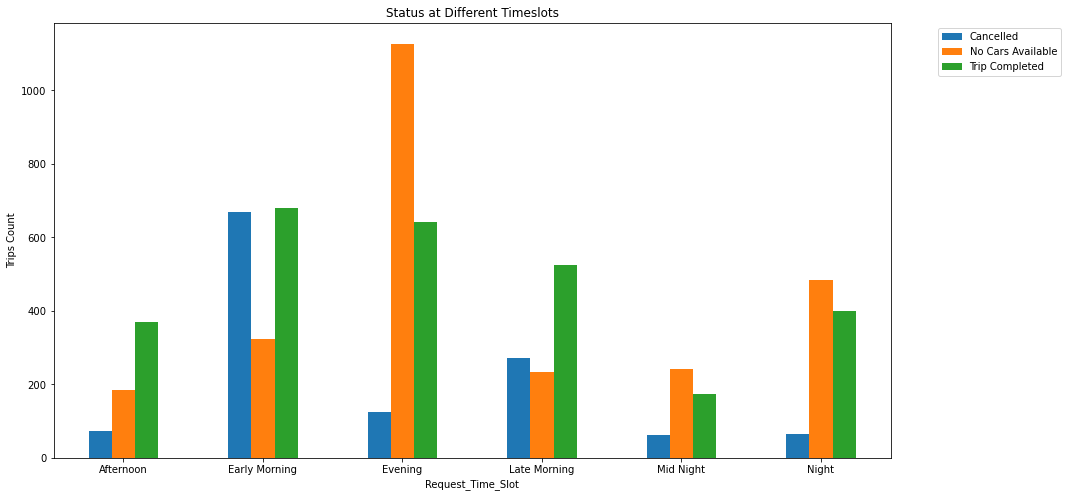

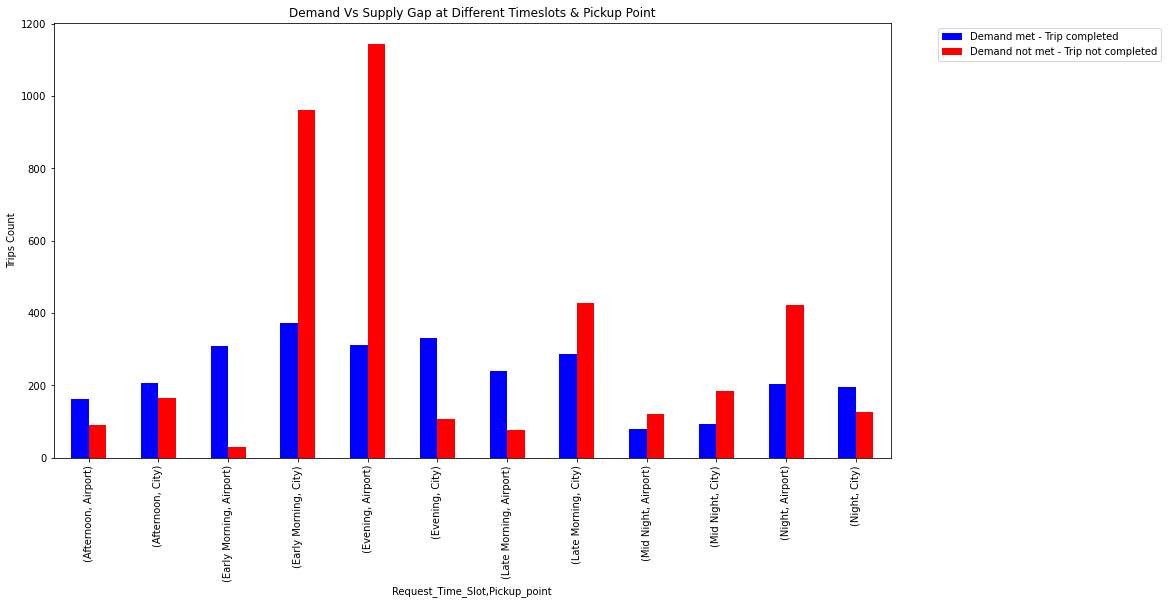

In [37]:
timeslotresults.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Trips Count")
plt.title("Status at Different Timeslots")
plt.xticks(rotation=0, horizontalalignment="center")
plt.gcf().set_size_inches(15, 8)
plt.show()
###############################################
gapTimeslotPickupPoint.plot(kind='bar', color=['Blue','Red'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Trips Count")
plt.title("Demand Vs Supply Gap at Different Timeslots & Pickup Point")
plt.xticks(rotation=90, horizontalalignment="center")
plt.gcf().set_size_inches(15, 8)
plt.show()

### <span style='background :yellow' > Answer:</span>

### From the analysis done till now and looking at the above plots we encounter the following issues:
#### <span style='background :yellow' > Issue-1</span> : Demand-Supply Gap exists highest at Early Morning (5 am -8 am) when Pickup_point = 'City' were the requests are being "Cancelled" more by drivers.
#### <span style='background :yellow' > Reasons</span> : 
> **1. Airports are situated in the outskirts of the city, during Early Morning (5 am -8 am) drivers tend to have inter city rides rather than travelling longer distance drop points such as Airports which results in longer wait time in getting a ride from Airports,hence cancels rides to "Airport" from "city".**

> **2. Where as during these hours, since most of the offices,schools and universities open, drivers tend to pick such rides which give them shorter wait time in getting next ride, hence cancels rides to "Airport" from "city".**


#### <span style='background :yellow' > Issue-2</span> : Demand-Supply Gap exists highest at At Evening (17 pm - 20 pm) when Pickup_point = 'Airport' were the requests are "No Cars Available".
#### <span style='background :yellow' > Reason</span> : 
> **1. This clearly shows that not enough cars are avialble at Airports, one of the reasons might be that, during these hours i.e. Evening (17 pm - 20 pm) a driver would get far more rides in city, since these are again peek hours were people tend to travel back to homes after work.**

-------------------------------------------
-----------------------------------------------

## Question-4: Recommend some ways to resolve the supply-demand gap.

### <span style='background :yellow' > Answer:</span>

### Recommendations for the following issues:
#### <span style='background :yellow' > Issue-1</span> : Demad-Supply Gap exists highest at Early Morning (5 am -8 am) when Pickup_point = 'City' were the requests are being "Cancelled" more by drivers.
#### <span style='background :yellow' > Recommendation</span> : 
> **1. Provide extra incentives to drivers during Early Morning (5 am -8 am) hours, if drop point is "Airport",this will motivate drivers to accept rides from "city" to "Airport" without hesitation.**

> **2. Provide monthly reward points and recognition for drivers, which will give popularity among other drivers.**

#### <span style='background :yellow' > Issue-2</span> : Demad-Supply Gap exists highest at At Evening (17 pm - 20 pm) when Pickup_point = 'Airport' were the requests are "No Cars Available".
#### <span style='background :yellow' > Recommendation</span> : 
> **1. Start dedicated "Airport" Taxis/Cabs which are available at "Airport" stand. Maintain minimum Taxis/cabs at "Airport" consistently during Evening (17 pm - 20 pm) hours.**

> **2. Make advertisements on how Uber is now having exclusive Taxis/Cabs for people travelling towards city.**

> **3. Have some 6 seater big cars also available, because people travelling back tend to have larger lagauge, also families tend to receive them from airport.**

--------------------------------------------------End--------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------